<a href="https://colab.research.google.com/github/mehrnazeraeisi/Body_Fat/blob/main/Bodyfat_knnregression_modification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split


In [4]:

# Function to prioritize features based on KNN R² score
def features_prioritization(X, y, features):
    features_scores = []
    knn_reg = KNeighborsRegressor()

    for feature in features:
        X_feature = X[[feature]]  # Ensure 2D
        knn_reg.fit(X_feature, y)
        r2 = knn_reg.score(X_feature, y)
        features_scores.append((feature, r2))

    df_scores = pd.DataFrame(features_scores, columns=['Feature', 'R2_Score']).sort_values(by='R2_Score', ascending=False)
    return df_scores


In [15]:
# بارگذاری فایل اکسل
data = pd.read_csv('bodyfat.csv')

print(data.columns)
# نمایش اطلاعات
print(data.head())
data.shape


Index(['Pct.BF', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen',
       'Waist', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Bicep', 'Forearm', 'Wrist'],
      dtype='object')
   Pct.BF  Age  Weight  Height  Neck  Chest  Abdomen      Waist    Hip  Thigh  \
0    12.3   23  154.25   67.75  36.2   93.1     85.2  33.543307   94.5   59.0   
1     6.1   22  173.25   72.25  38.5   93.6     83.0  32.677165   98.7   58.7   
2    25.3   22  154.00   66.25  34.0   95.8     87.9  34.606299   99.2   59.6   
3    10.4   26  184.75   72.25  37.4  101.8     86.4  34.015748  101.2   60.1   
4    28.7   24  184.25   71.25  34.4   97.3    100.0  39.370079  101.9   63.2   

   Knee  Ankle  Bicep  Forearm  Wrist  
0  37.3   21.9   32.0     27.4   17.1  
1  37.3   23.4   30.5     28.9   18.2  
2  38.9   24.0   28.8     25.2   16.6  
3  37.3   22.8   32.4     29.4   18.2  
4  42.2   24.0   32.2     27.7   17.7  


(250, 15)

In [16]:
import pandas as pd

# اطلاعات ویژگی‌ها
columns_info = {
    'Pct.BF': ['درصد چربی بدن', 'هدف اصلی مدل؛ مقدار درصد چربی بدن فرد'],
    'Age': ['سن', 'سن فرد (به سال)'],
    'Weight': ['وزن', 'وزن بدن به پوند (lbs)'],
    'Height': ['قد', 'قد فرد به اینچ (inch)'],
    'Neck': ['دور گردن', 'محیط دور گردن به سانتی‌متر'],
    'Chest': ['دور سینه', 'محیط دور سینه (سانتی‌متر)'],
    'Abdomen': ['دور شکم', 'محیط دور شکم در سطح ناف (سانتی‌متر)'],
    'Waist': ['دور کمر', 'محیط کمر (سانتی‌متر)'],
    'Hip': ['دور باسن', 'محیط باسن (سانتی‌متر)'],
    'Thigh': ['دور ران', 'محیط ران (سانتی‌متر)'],
    'Knee': ['دور زانو', 'محیط دور زانو (سانتی‌متر)'],
    'Ankle': ['دور مچ پا', 'محیط دور مچ پا (سانتی‌متر)'],
    'Bicep': ['دور بازو', 'محیط دور بازوی بدون انقباض (سانتی‌متر)'],
    'Forearm': ['دور ساعد', 'محیط ساعد (سانتی‌متر)'],
    'Wrist': ['دور مچ دست', 'محیط دور مچ دست (سانتی‌متر)']
}

# ساخت جدول فارسی مرتب
df_description = pd.DataFrame([
    {'🆔 نام ستون': key, '📌 معنی': val[0], '📝 توضیح': val[1]} for key, val in columns_info.items()
])

# نمایش جدول (اگر در Jupyter یا Colab هستی بدون print)
df_description


,🆔 نام ستون,📌 معنی,📝 توضیح
0,Pct.BF,درصد چربی بدن,هدف اصلی مدل؛ مقدار درصد چربی بدن فرد
1,Age,سن,سن فرد (به سال)
2,Weight,وزن,وزن بدن به پوند (lbs)
3,Height,قد,قد فرد به اینچ (inch)
4,Neck,دور گردن,محیط دور گردن به سانتی‌متر
5,Chest,دور سینه,محیط دور سینه (سانتی‌متر)
6,Abdomen,دور شکم,محیط دور شکم در سطح ناف (سانتی‌متر)
7,Waist,دور کمر,محیط کمر (سانتی‌متر)
8,Hip,دور باسن,محیط باسن (سانتی‌متر)
9,Thigh,دور ران,محیط ران (سانتی‌متر)


In [17]:

# جدا کردن ویژگی‌ها و برچسب‌ها
X_data = data.drop('Pct.BF', axis=1)  # همه ستون‌ها به جز 'target'
y_data = data['Pct.BF']              # فقط ستون 'target'
data_features = X_data.columns       # نام ویژگی‌ها




In [18]:
# Run feature prioritization for the iris dataset
data_scores = features_prioritization(X_data, y_data, data_features)
print("🔎 Feature Group Performance Summary (Diabetes dataset):")
print(data_scores)  # Categorize features by R² score

🔎 Feature Group Performance Summary (Diabetes dataset):
    Feature  R2_Score
5   Abdomen  0.737504
6     Waist  0.734626
4     Chest  0.596521
7       Hip  0.559713
1    Weight  0.492824
8     Thigh  0.446252
9      Knee  0.388234
11    Bicep  0.380885
3      Neck  0.362199
12  Forearm  0.317555
0       Age  0.177948
10    Ankle  0.162243
13    Wrist  0.154164
2    Height  0.066595


In [44]:
# Categorizing features by R² score into multiple levels
strong_features = data_scores[data_scores['R2_Score'] > 0.7]['Feature'].tolist()
medium_features_1 = data_scores[(data_scores['R2_Score'] > 0.5)]['Feature'].tolist()
medium_features_2 = data_scores[(data_scores['R2_Score'] > 0.4)]['Feature'].tolist()
medium_features_3 = data_scores[(data_scores['R2_Score'] > 0.3)]['Feature'].tolist()
medium_features_4 = data_scores[(data_scores['R2_Score'] > 0.17)]['Feature'].tolist()
medium_features_5 = data_scores[(data_scores['R2_Score'] > 0.16)]['Feature'].tolist()
medium_features_6 = data_scores[(data_scores['R2_Score'] > 0.15)]['Feature'].tolist()


In [45]:
# Function to safely compute KNN R² score for feature group

def knn_score(X_data, y_data, selected_features):
    if len(selected_features) == 0:  # اصلاح این خط
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X_data[selected_features]
    model.fit(X_subset, y_data)
    return model.score(X_subset, y_data)

In [46]:

#[8]
# Compute R² and accuracy scores for each group
groups = [data_features, strong_features, medium_features_1, medium_features_2, medium_features_3,
          medium_features_4, medium_features_5, medium_features_6]

r2_scores = [knn_score(X_data, y_data, group) for group in groups]


In [47]:
# Build summary DataFrame
summary_df = pd.DataFrame({
    'Feature_Group': ['All Features', 'Strong Features', 'Medium Features_1 (0.7-0.8)', 'Medium Features_2 (0.6-0.7)',
                      'Medium Features_3 (0.5-0.6)', 'Medium Features_4 (0.4-0.5)', 'Medium Features_5 (0.3-0.4)',
                      'Medium Features_6 (0.2-0.3)'],
    'R2_Score': r2_scores
})

print("\n📊 Grouped Feature Performance Summary (R² and Accuracy):")
print(summary_df)



📊 Grouped Feature Performance Summary (R² and Accuracy):
                 Feature_Group  R2_Score
0                 All Features  0.726921
1              Strong Features  0.738181
2  Medium Features_1 (0.7-0.8)  0.746600
3  Medium Features_2 (0.6-0.7)  0.747717
4  Medium Features_3 (0.5-0.6)  0.752799
5  Medium Features_4 (0.4-0.5)  0.736672
6  Medium Features_5 (0.3-0.4)  0.733268
7  Medium Features_6 (0.2-0.3)  0.733458


In [48]:

def knn_evaluation(X_data, y_data,strong_features , medium_features_2, medium_features_3, data_features, test_size, n_repeats):
    # Initialize lists to store the results

    r2_scores = {
        "All_features": [],
        "strong_features":[],
        "medium_features_2": [],
        "medium_features_3": [],
    }


    # List of feature groups to evaluate
    feature_groups = {
        "All_features": data_features,
        "strong_features": strong_features,
        "medium_features_2": medium_features_2,
        "medium_features_3":medium_features_3
    }

    # Repeat the process n_repeats times with different train-test splits
    for _ in range(n_repeats):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

        for group_name, group_features in feature_groups.items():
            # KNN Regressor
            knn_reg = KNeighborsRegressor(n_neighbors=5)
            knn_reg.fit(X_train[group_features], y_train)
            y_pred_reg = knn_reg.predict(X_test[group_features])
            r2_scores[group_name].append(r2_score(y_test, y_pred_reg))

    # Plot results for R² and Accuracy
    x = np.arange(1, n_repeats + 1)


    # R² plot
    plt.figure( figsize=(12, 6))
    for group_name, r2_list in r2_scores.items():
        plt.plot(x, r2_list, label=f"{group_name.replace('_', ' ').title()} R²", marker='x')
    plt.xlabel('Repeat')
    plt.ylabel('R² Score')
    plt.title('KNN Regressor Performance')
    plt.legend()
    plt.show()



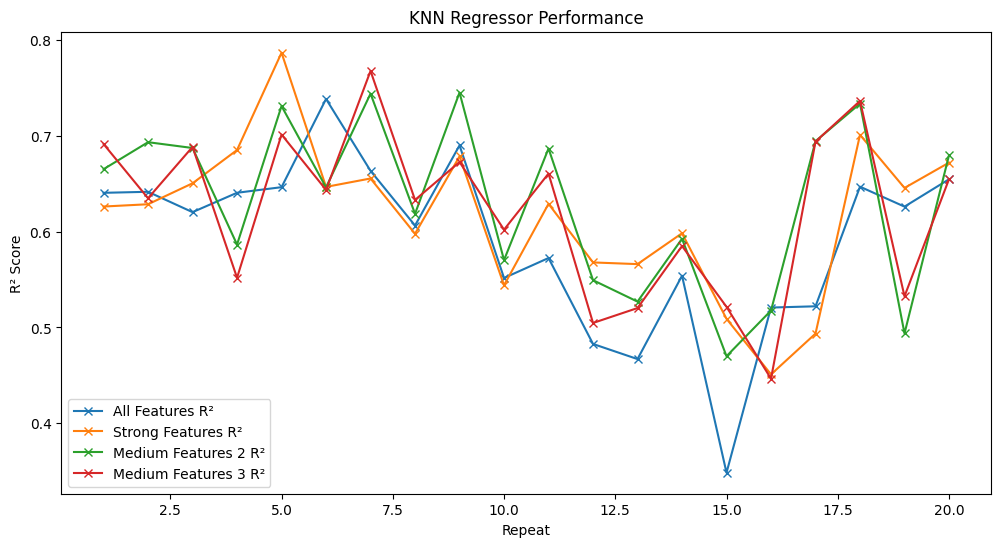

In [49]:

# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, strong_features, medium_features_2, medium_features_3, data_features, test_size=0.1, n_repeats=20)


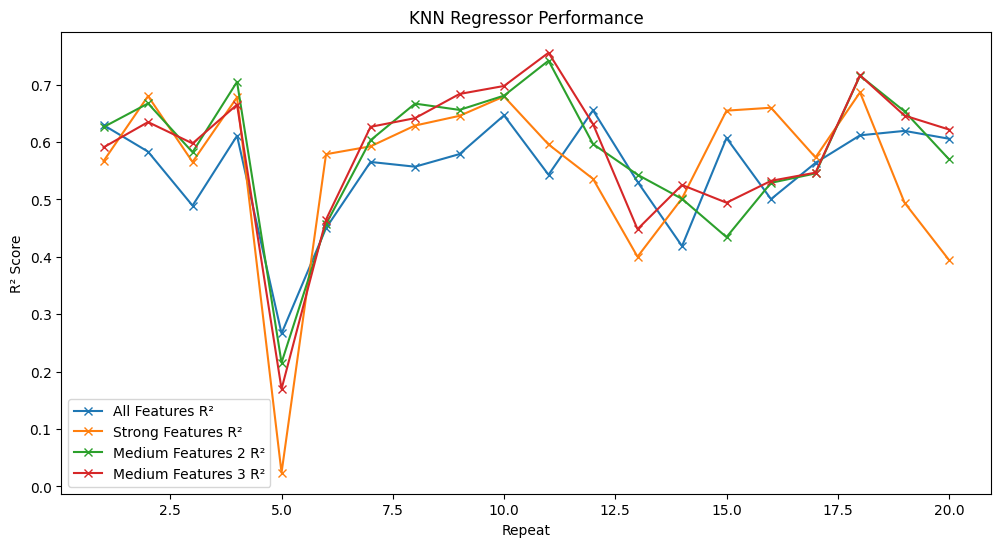

In [50]:

# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, strong_features, medium_features_2, medium_features_3, data_features, test_size=0.13, n_repeats=20)


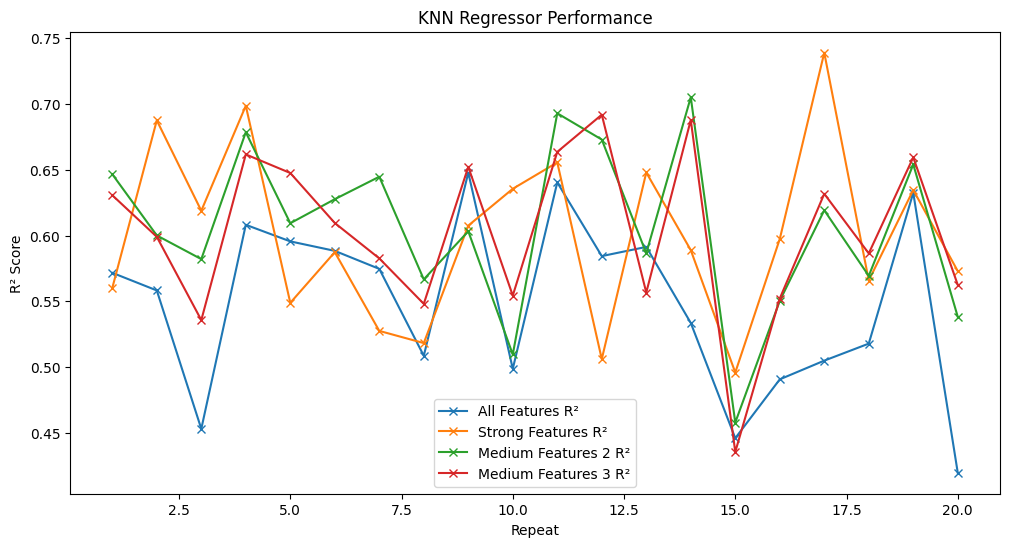

In [51]:

# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, strong_features, medium_features_2, medium_features_3, data_features, test_size=0.16, n_repeats=20)


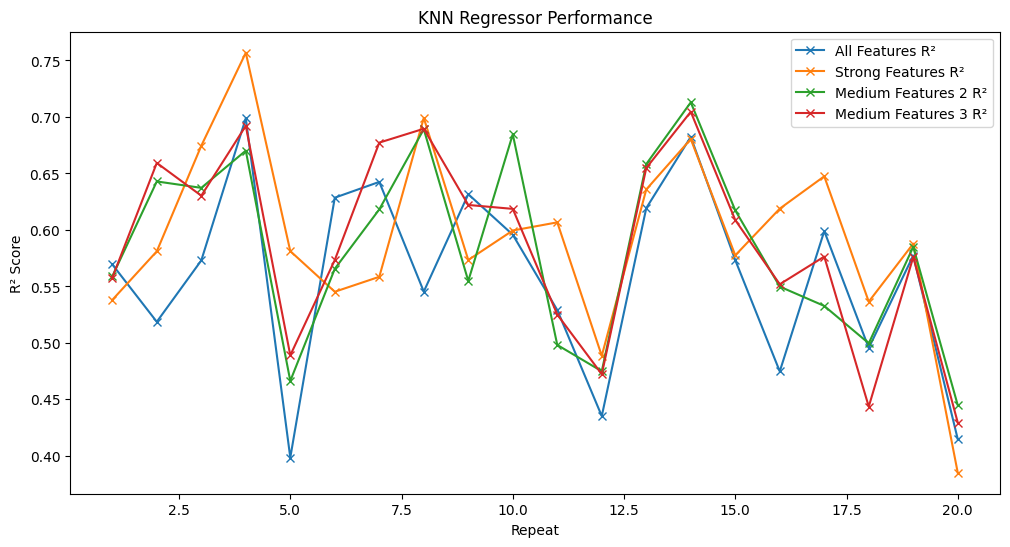

In [52]:

# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, strong_features, medium_features_2, medium_features_3, data_features, test_size=0.19, n_repeats=20)


Index(['Pct.BF', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen',
       'Waist', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Bicep', 'Forearm', 'Wrist'],
      dtype='object')
   Pct.BF  Age  Weight  Height  Neck  Chest  Abdomen      Waist    Hip  Thigh  \
0    12.3   23  154.25   67.75  36.2   93.1     85.2  33.543307   94.5   59.0   
1     6.1   22  173.25   72.25  38.5   93.6     83.0  32.677165   98.7   58.7   
2    25.3   22  154.00   66.25  34.0   95.8     87.9  34.606299   99.2   59.6   
3    10.4   26  184.75   72.25  37.4  101.8     86.4  34.015748  101.2   60.1   
4    28.7   24  184.25   71.25  34.4   97.3    100.0  39.370079  101.9   63.2   

   Knee  Ankle  Bicep  Forearm  Wrist  
0  37.3   21.9   32.0     27.4   17.1  
1  37.3   23.4   30.5     28.9   18.2  
2  38.9   24.0   28.8     25.2   16.6  
3  37.3   22.8   32.4     29.4   18.2  
4  42.2   24.0   32.2     27.7   17.7  
🔎 Feature Group Performance Summary (Cancer dataset):
    Feature  R2_Score
5   Abdomen  0.737504
6 

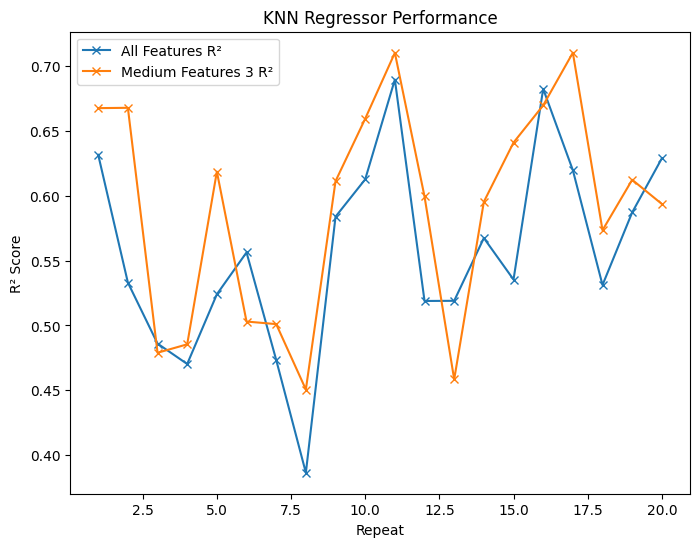

In [55]:
#[1]
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split



#[2]
# Function to prioritize features based on KNN R² score
def features_prioritization(X, y, features):
    features_scores = []
    knn_reg = KNeighborsRegressor()

    for feature in features:
        X_feature = X[[feature]]  # Ensure 2D
        knn_reg.fit(X_feature, y)
        r2 = knn_reg.score(X_feature, y)
        features_scores.append((feature, r2))

    df_scores = pd.DataFrame(features_scores, columns=['Feature', 'R2_Score']).sort_values(by='R2_Score', ascending=False)
    return df_scores




# بارگذاری فایل اکسل
# بارگذاری فایل اکسل
data = pd.read_csv('bodyfat.csv')

print(data.columns)
# نمایش اطلاعات
print(data.head())
data.shape


# جدا کردن ویژگی‌ها و برچسب‌ها
X_data = data.drop('Pct.BF', axis=1)  # همه ستون‌ها به جز 'target'
y_data = data['Pct.BF']              # فقط ستون 'target'
data_features = X_data.columns       # نام ویژگی‌ها






#[5]
# Run feature prioritization for the iris dataset
data_scores = features_prioritization(X_data, y_data, data_features)
print("🔎 Feature Group Performance Summary (Cancer dataset):")
print(data_scores)  # Categorize features by R² score

# Categorizing features by R² score into multiple levels
strong_features = data_scores[data_scores['R2_Score'] > 0.7]['Feature'].tolist()
medium_features_1 = data_scores[(data_scores['R2_Score'] > 0.5)]['Feature'].tolist()
medium_features_2 = data_scores[(data_scores['R2_Score'] > 0.4)]['Feature'].tolist()
medium_features_3 = data_scores[(data_scores['R2_Score'] > 0.3)]['Feature'].tolist()
medium_features_4 = data_scores[(data_scores['R2_Score'] > 0.17)]['Feature'].tolist()
medium_features_5 = data_scores[(data_scores['R2_Score'] > 0.16)]['Feature'].tolist()
medium_features_6 = data_scores[(data_scores['R2_Score'] > 0.15)]['Feature'].tolist()



#[7]
# Function to safely compute KNN R² score for feature group

def knn_score(X_data, y_data, selected_features):
    if len(selected_features) == 0:  # اصلاح این خط
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X_data[selected_features]
    model.fit(X_subset, y_data)
    return model.score(X_subset, y_data)






#[8]
# Compute R² and accuracy scores for each group
groups = [data_features, strong_features, medium_features_1, medium_features_2, medium_features_3,
          medium_features_4, medium_features_5, medium_features_6]

r2_scores = [knn_score(X_data, y_data, group) for group in groups]


# Build summary DataFrame
summary_df = pd.DataFrame({
    'Feature_Group': ['All Features', 'Strong Features', 'Medium Features_1 (0.7-0.8)', 'Medium Features_2 (0.6-0.7)',
                      'Medium Features_3 (0.5-0.6)', 'Medium Features_4 (0.4-0.5)', 'Medium Features_5 (0.3-0.4)',
                      'Medium Features_6 (0.2-0.3)'],
    'R2_Score': r2_scores
})

print("\n📊 Grouped Feature Performance Summary (R² and Accuracy):")
print(summary_df)




def knn_evaluation(X_data, y_data, medium_features_3, data_features, test_size, n_repeats):
    # Initialize lists to store the results

    r2_scores = {
        "all_features": [],
        "medium_features_3": [],
    }

    # List of feature groups to evaluate
    feature_groups = {
        "all_features": data_features,
        "medium_features_3": medium_features_2,
    }

    # Repeat the process n_repeats times with different train-test splits
    for _ in range(n_repeats):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

        for group_name, group_features in feature_groups.items():
            # KNN Regressor
            knn_reg = KNeighborsRegressor(n_neighbors=5)
            knn_reg.fit(X_train[group_features], y_train)
            y_pred_reg = knn_reg.predict(X_test[group_features])
            r2_scores[group_name].append(r2_score(y_test, y_pred_reg))

    # Plot results for R² and Accuracy
    x = np.arange(1, n_repeats + 1)


    # R² plot
    plt.figure( figsize=(8, 6))
    for group_name, r2_list in r2_scores.items():
        plt.plot(x, r2_list, label=f"{group_name.replace('_', ' ').title()} R²", marker='x')
    plt.xlabel('Repeat')
    plt.ylabel('R² Score')
    plt.title('KNN Regressor Performance')
    plt.legend()
    plt.show()



# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data,  medium_features_4, data_features, test_size=0.19, n_repeats=20)
